# The Odyssey of Homer
### Comparing Translations

Texts used:
- [Homer, The Odyssey, transl. Alexander Pope, 1725](https://www.gutenberg.org/files/3160/3160-0.txt)
- [Homer, The Odyssey, transl. Samuel Butler, 1900](https://www.gutenberg.org/cache/epub/1727/pg1727.txt)
- [Ὅμηρος, Οδύσσεια Τόμος Α, c. 750-700 BC](https://www.gutenberg.org/files/30613/30613-0.txt)
- [Ὅμηρος, Οδύσσεια Τόμος Β, c. 750-700 BC](https://www.gutenberg.org/files/30614/30614-0.txt)
- [Ὅμηρος, Οδύσσεια Τόμος Γ, c. 750-700 BC](https://www.gutenberg.org/files/30615/30615-0.txt)
- [Ὅμηρος, Οδύσσεια Τόμος Δ, c. 750-700 BC](https://www.gutenberg.org/files/30616/30616-0.txt)

Reference used for Greek to English translation: [Perseus](https://www.perseus.tufts.edu/hopper/morph) LSJ

In [30]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
en_stop_words = nltk.corpus.stopwords.words('english') + [
 'thy', 'thus', 'o\'er', 'shall', 'thou', 'yet', 'every',
 'us', 'upon', 'may', 'whose', 'till', 'would', 'could', 'one', 'thee', 'ut', '\'re','.', 
 ',', '--', '\'s', '?', ')', '(', ':', '\'', '\"', '-', '}', 
 '{', '&', '|', u'\u2014' ]

print (en_stop_words)

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    r.encoding = 'utf-8'
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in en_stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_pope, tw_pope) = get_wf('http://www.gutenberg.org/files/3160/3160-0.txt')
(wf_butler, tw_butler) = get_wf('http://www.gutenberg.org/cache/epub/1727/pg1727.txt')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

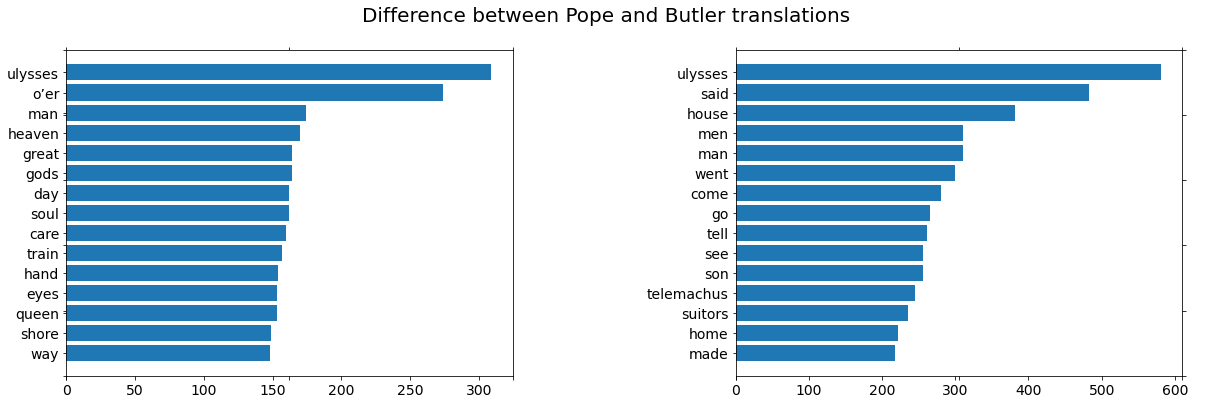

In [31]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_pope, wf_butler, title):
    f = plt.figure (figsize=(20, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_pope)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_pope ])
    ax1 .barh (range(len(wf_pope)), [ x [1] for x in wf_pope ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_butler)) 
    pylab .yticks (pos, [ x [0] for x in wf_butler ])
    ax2 .barh (range (len(wf_butler)), [ x [1] for x in wf_butler ], align='center')

plotTwoLists (wf_pope, wf_butler, 'Difference between Pope and Butler translations')

In [32]:
gk_stop_words = nltk.corpus.stopwords.words('greek') + ['ταις',
 'ότι', 'εγώ', 'αλλ', 'από', 'μ', 'τ', 'σου', 'ως', 'απ', 'της',
 'εις', 'μου', 'τους', 'ς', 'ότ', 'τώρα', 'μας', 'αλλά', 'προς', 
 'αυτά', 'αυτός', 'αυτόν', 'είναι', 'τότ', 'συ', 'σ', 'ή', 'οπού',
 'αυτού', 'πε', 'ν', 'εκείνος', 'ας', 'εδώ', 'άμ', 'πώς', 'έχει',
 'εκείνοι', 'όλους', 'όλοι', 'όλα', 'όπως', 'αυτούς', 'αφού', 'ω', 'works', 'ut', '\'re','.', ',',
 '--', '\'s', '?', ')', '(', ':', '\'', '\"', '-', '}', '{', '&',
 '|', u'\u2014' ]

def get_wf_gk ():
    # first get the web page
    full = ''
    for i in range(4):
        r = requests .get('https://www.gutenberg.org/files/3061' + str(3+i) + '/3061' + str(3+i) + '-0.txt')
        full = full + r.text.encode('latin1').decode('utf-8')
    
    # Now clean
    # remove html markup
    t = cleanHtml (full) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in gk_stop_words:
        wf. pop(k, None)
    
    for k in en_stop_words:
        wf .pop(k, None)
        
    # Remove empty string (???)
    wf. pop('', None)
    wf. pop('project', None)
    wf. pop('gutenberg-tm', None)
    wf. pop('work', None)
    wf. pop('gutenberg', None)
    wf. pop('electronic', None)
    
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)

# now populate list
(wf_gk, tw_gk) = get_wf_gk()
print (wf_gk)

[('χέρια', 105), ('εμπρός', 108), ('δώμα', 110), ('πατρίδα', 112), ('τηλέμαχος', 113), ('καράβι', 134), ('μέσα', 139), ('ψυχή', 148), ('σιμά', 154), ('είχε', 168), ('οδυσσέας', 189), ('ευθύς', 191), ('οδυσσέα', 193), ('είπε', 199), ('σπίτι', 243)]


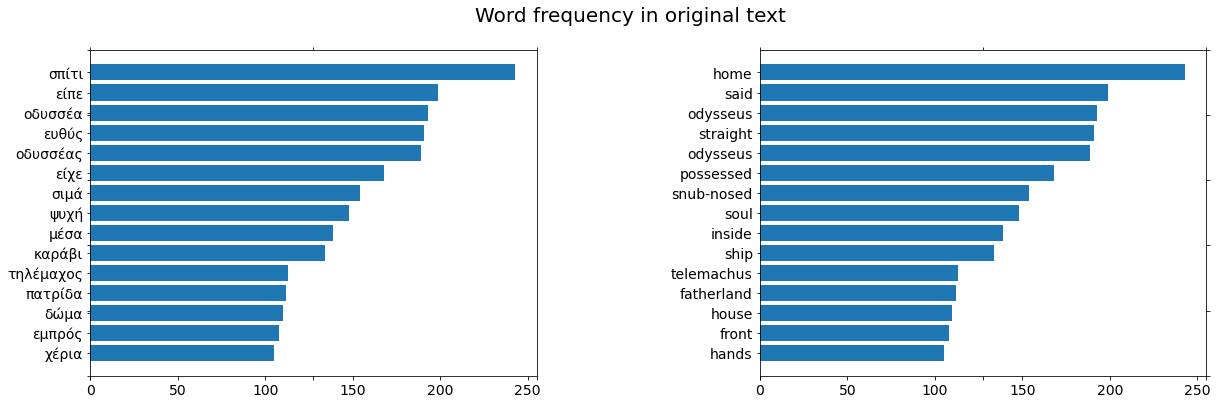

In [33]:
gk_list_transl = [('hands', 105), ('front', 108), ('house', 110), ('fatherland', 112), ('telemachus', 113), 
                  ('ship', 134), ('inside', 139), ('soul', 148), ('snub-nosed', 154), ('possessed', 168), 
                  ('odysseus', 189), ('straight', 191), ('odysseus', 193), ('said', 199), ('home', 243)]

def plotList (wf_gk, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create subplot
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_gk)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_gk ])
    ax1 .barh (range(len(wf_gk)), [ x [1] for x in wf_gk ], align='center')

plotTwoLists (wf_gk, gk_list_transl, 'Word frequency in original text')

## Conclusion
Taking into account the two forms of the name Odysseus that appear in the Greek list, it occurs around 400 times, making it the most common word in each version of the text (both translations opt for the Latinized Ulysses). It occurs most frequently in the Butler translation, around 600 times, and least frequently in the Pope, slightly over 300. 

Words unique to the Pope translation's list (excluding those that appear in another list in a different case) are 'o'er', 'heaven', 'great', 'gods', 'day', 'care', 'train', 'eyes', 'queen', 'shore', and 'way'. Noteworthy is the unique absence of the name of Telemachus, Odysseus' son, from this list.

Words unique to the Butler translation's list are 'went', 'come', 'go', 'tell', 'see', 'son', 'suitors', and 'made'.

Words unique to the original text are 'ευθύς' ('straight'), 'είχε' ('possessed'), 'σιμά' ('snub-nosed'), 'μέσα' ('inside'), 'καράβι' ('ship'), 'πατρίδα' ('fatherland'), and 'εμπρός' ('front'). The high frequency of 'σιμά' ('snub-nosed') is somewhat puzzling. The [LSJ](https://www.perseus.tufts.edu/hopper/morph?l=%CF%83%CE%B9%CE%BC%CE%AC&la=greek#lexicon) notes this adjective as being used of 'the Ethiopians and their gods,... the Scythians,' children, dolphins, dogs, the hippopotamus, 'the ponies of the Sigynnae,' bees, and goats. Alternative definitions given are 'bent upwards', 'up-hill', 'hollow', 'concave', and 'rounded and tapering off towards the end'.

The variation between the texts is quite high, perhaps due to stylistic differences (prose vs. verse), linguistic differences (English vs. Homeric Greek), and the drastically different time periods during which they were composed.